# **Extract data through Google API**

In [1]:
from extract_data.call_ListGauges import get_ListGauges

In [2]:
import os
from typing import List, Dict, Any
import json
import pandas as pd
import geopandas as gpd
import requests
import pprint
import datetime
import matplotlib.pyplot as plt

##### **Steps**:
To get the data from the Google Bucket into workable format, we follow:
* Connect with the API
* **Expand this step!** Set-up pipeline which downloads all relevant data per country code
* Format the data into DateTime (y) and features (x)
* Store externally as .csv

##### **Background info -- API**
The API has three basic functions:
* *ListGauges*: Returns a list of supported gauges within a given country (code)
* *GetGaugeModel*: Returns model information of a specific gauge (within a given country, that is)
* *QueryGaugeForecasts*: Returns the forecasts of specific gauge

We'll create a pipeline going through these three functions, taking as input just the target country and outputting a DateTime-indexed .csv with all available forecasts for that country's available gauges. 

##### **(??? -> Maybe this is too much... A format which uses a list of matrices (an implicit tensor) where the matrices are just one gauge might be better. Either way, the metadata is best stored separately in a separate .csv. Choose adequate naming here.)**

For subsequent analysis, see ../analyse_data/

In [4]:
def get_country_codes(path : str) -> Dict:
    """
    Get the country codes from a .json file stored elsewhere

    :param path: path to the .json file containing the country codes
    :return: the country codes
    """
    with open(path, 'r') as f:
        return json.load(f)


path_country_codes = "../../data/country_codes.json"
dict_country_codes = get_country_codes(path_country_codes)

In [5]:
# Note: add this folder manually at the pointed path for the script to run
# For the key, ask the owner of the repository or try guessing
path_API_key = "../../data/keys/API_key.txt"

In [8]:
df_gauges_ML = get_ListGauges('ML', path_API_key)

In [9]:
print(type(df_gauges_ML))
print(len(df_gauges_ML))
print(df_gauges_ML.columns)


<class 'pandas.core.frame.DataFrame'>
16
Index(['siteName', 'source', 'river', 'gaugeId', 'qualityVerified', 'latitude',
       'longitude'],
      dtype='object')


In [10]:
print(df_gauges_ML.head(2))

  siteName source river           gaugeId  qualityVerified   latitude  \
0           HYBAS        hybas_1121890140             True  14.314583   
1           HYBAS        hybas_1120737100             True  12.018750   

   longitude  
0  -4.422917  
1  -8.322917  


In [11]:
def convert_df_to_gdf(df : pd.DataFrame) -> gpd.GeoDataFrame:
    """
    Convert a DataFrame to a GeoDataFrame by taking the latitude and longitude columns

    :param df: the DataFrame
    :return: the GeoDataFrame
    """
    return gpd.GeoDataFrame(
        df,
        geometry = gpd.points_from_xy(df['longitude'], df['latitude']),
        crs = 'EPSG:4326' # Uniform projection to WGS84
    )


def map_gauge_coordinates_of_country(df : pd.DataFrame, country : str) -> None:
    """
    Map gauge coordinates

    :param df: the DataFrame with the gauges
    :return: the GeoDataFrame
    """
    gdf = convert_df_to_gdf(df)

    # try:
    #     shape = gpd.read_file(f"../../data/shape_files/{country}_country_bounds.shp")
    # except Exception as exc:
    #     raise Exception(f'Error reading shape file: {exc}')

    fig, ax = plt.subplots()
    # shape.plot(ax = ax, color = 'lightgrey')
    gdf.plot(ax = ax, color = 'red', markersize = 10)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Gauge locations for {country}')
    ax.set_aspect('equal') # Ensure unwarped aspect ratio
    plt.show()

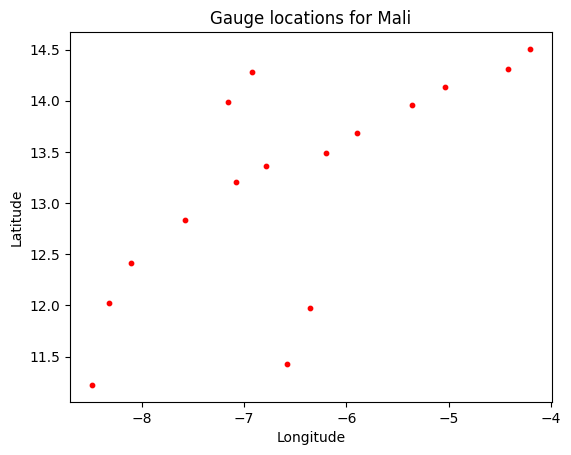

In [12]:
map_gauge_coordinates_of_country(df_gauges_ML, 'Mali')

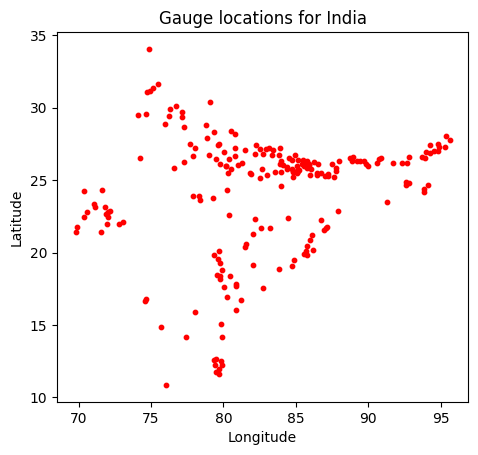

In [13]:
map_gauge_coordinates_of_country(get_ListGauges('IN', path_API_key), 'India')

In [ ]:
from typing import List, Dict, Any
import requests
import pandas as pd

from get_key import get_API_key


def generate_url_GetGaugeModel(path_to_key : str) -> str:
    """
    Generate the URL to get the gauge model for a specific gauge

    :param path_to_key: path to the API key
    :return: the URL
    """
   
    # NEXT STEP: Kijk in voorbeeld Colab hoe ze het doen want de .pdf instructie klopt niet